# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Descriptive Statistics Assignment </span> </div>

###### Note: 
<div class="alert alert-block alert-danger"> <span style="font-family: Times New Roman"> 
    - Kindly use this notebook to solve the programming problems. <br>
    - Submit assignments with .ipynb file extension.<br>
- Kindly write down the explanations/insights for the graphs.<br>
- Kindly use comments or markdowns to explain logic behind the codes, approach to solve the problem.</span></div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
</p>
<p style='margin-left:1em;'>
<b>The below-given data is of two batsmen from which the captain has to select one batsman. As a captain, I need a batsman whose performance is stable in England. A test series is happening in England during winter. Use Descriptive statistics to select one batsman who can probably perform better than the other. Please give proper reasoning behind your selection, like why you have chosen the particular batsman supported by statistic outputs. You have to show your numerical findings with the help of Python code, and a theoretical interpretation also is given to support your conclusion. 
    </b></p>
    
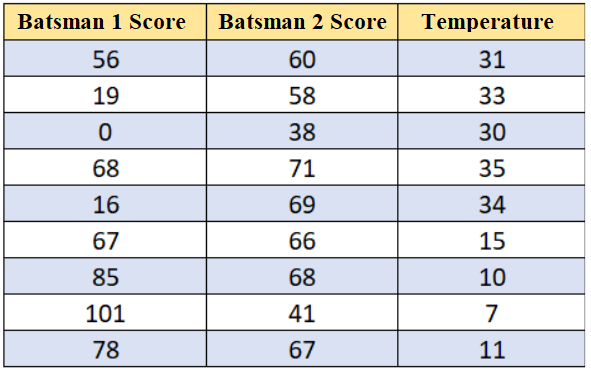

</span>
</div>



##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  <mark><span  style= "font-family: Times New Roman">View the data</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [2]:
#Creating Series of scores of the two batsmen and temperature as given
b1 = pd.Series([56, 19, 0, 68, 16, 67, 85, 101, 78])
b2 = pd.Series([60, 58, 38, 71, 69, 66, 68, 41, 67])
temp = pd.Series([31,33,30,35,34,15,10,7,11])

In [3]:
#Creating and viewing the dataframe with the scores and temperature data

df = pd.DataFrame({
    "Batsman 1": b1,
    "Batsman 2": b2,
    "Temperature": temp
})
print(df)

   Batsman 1  Batsman 2  Temperature
0         56         60           31
1         19         58           33
2          0         38           30
3         68         71           35
4         16         69           34
5         67         66           15
6         85         68           10
7        101         41            7
8         78         67           11



##  <mark><span  style= "font-family: Times New Roman">Data preprocessing</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
</p>
<p style='margin-left:1em;'>
</p><br>
   
  1. Third match score of Batsman-1 was mistakenly noted as 0. Kindly replace the value with the mean of earlier matches as it is not known.Round the calculated mean to the nearest integer. <br>    

2. Create a new feature in the dataframe naming 'weather' <br>
    
   a. Column should have 'Warm' if the temperature on the match day is greater than the mean of the temperatures.  <br>
   b. Column should have 'Cool' if the temperature on the match day is lesser than the mean of the temperatures.  <br>
</span>
</div>


In [4]:
# Calculate the mean of the earlier matches for Batsman-I
mean_b1 = round(b1.iloc[:2].mean())
print(mean_b1)

# Replace the third match score with the calculated mean
df.at[2, "Batsman 1"] = mean_b1

# Print the updated DataFrame
print(df)

38
   Batsman 1  Batsman 2  Temperature
0         56         60           31
1         19         58           33
2         38         38           30
3         68         71           35
4         16         69           34
5         67         66           15
6         85         68           10
7        101         41            7
8         78         67           11


In [5]:
# Calculate the mean temperature
mean_temp = temp.mean()

# Create a new 'weather' column based on temperature conditions
df['weather'] = np.where(df['Temperature'] > mean_temp, 'Warm', 'Cool')

# Print the updated DataFrame
print(df)

   Batsman 1  Batsman 2  Temperature weather
0         56         60           31    Warm
1         19         58           33    Warm
2         38         38           30    Warm
3         68         71           35    Warm
4         16         69           34    Warm
5         67         66           15    Cool
6         85         68           10    Cool
7        101         41            7    Cool
8         78         67           11    Cool


##  <mark><span  style= "font-family: Times New Roman">Perform EDA</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

### Visualize the evidences 

In [6]:
#Finding out the score means(averages) of the two batsmen
m1 = df['Batsman 1'].mean()
m2 = df['Batsman 2'].mean()

#Finding the standard deviation of scores of the two batsmen
s1 = np.std(df['Batsman 1'])
s2 = np.std(df['Batsman 2'])

#Finding the coefficient of variance of scores of the two batsmen
cv1 = (s1*100)/m1
cv2 = (s2*100)/m2

In [7]:
# Define a function to calculate coefficient of variation for numeric columns
def calculate_cv(x):
    if np.issubdtype(x.dtype, np.number):  # Check if the column is numeric
        return (np.std(x) / np.mean(x)) * 100
    else:
        return np.nan  # Return NaN for non-numeric columns

# Apply the function to each column of the DataFrame
cv_result = df.apply(calculate_cv)

# Display the result
print(cv_result)

Batsman 1      47.004813
Batsman 2      19.312974
Temperature    48.538835
weather              NaN
dtype: float64


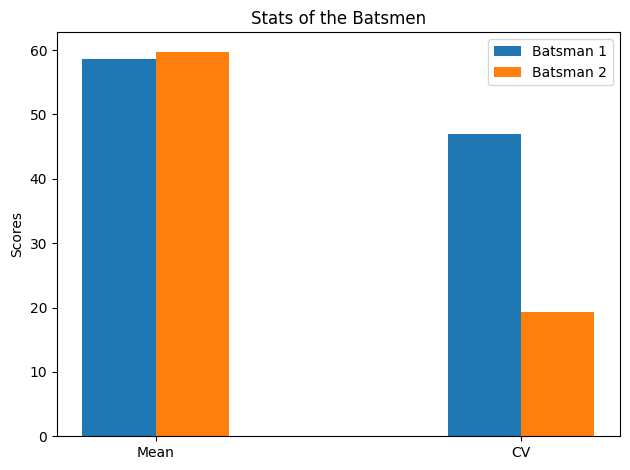

In [8]:
#Creating three variables to plot
stats = ['Mean', 'CV'] #List with two labels f=of stats, 'Mean' & 'Coefficient of Variation'
batsman_1 = [m1, cv1] #List of the mean value and variation of Batsman 1
batsman_2 = [m2, cv2] #List of the mean value and variation of Batsman 2

#x-axis
x = np.arange(len(stats))
width = 0.2

#Using subplots
fig, ax = plt.subplots()

#Using bar plot to compare the Mean and Variation of the two Batsmen
rects1 = ax.bar(x-width/2, batsman_1, width, label='Batsman 1')
rects2 = ax.bar(x+width/2, batsman_2, width, label='Batsman 2')

#Adding Title and Labels
ax.set_title('Stats of the Batsmen')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.set_ylabel('Scores')
ax.legend()

fig.tight_layout()
plt.show()

In [9]:
#Sorting the dataframe by Temperature

df.sort_values(by='Temperature',
               axis=0,
               ascending=True,
               inplace=True)

In [10]:
#Resetting the dataframe index
df.reset_index()

,index,Batsman 1,Batsman 2,Temperature,weather
0,7,101,41,7,Cool
1,6,85,68,10,Cool
2,8,78,67,11,Cool
3,5,67,66,15,Cool
4,2,38,38,30,Warm
5,0,56,60,31,Warm
6,1,19,58,33,Warm
7,4,16,69,34,Warm
8,3,68,71,35,Warm


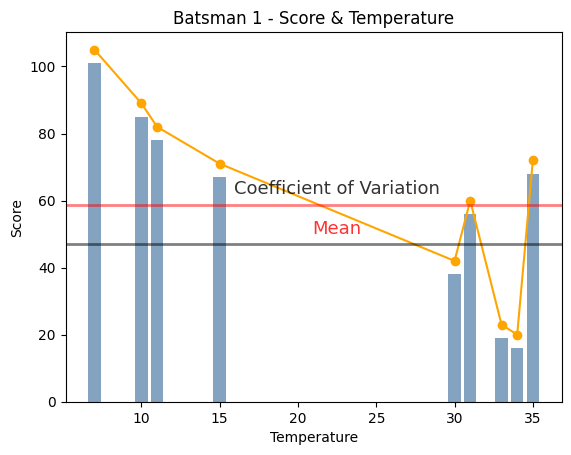

In [11]:
#Defining the x and y axes
x = df['Temperature']
y1 = df['Batsman 1']

#Using a new list of y variable to maintain some gap between the bars and the line chart to make it visually appealing
y1_new = [i+4 for i in y1]

fig, ax = plt.subplots()
#Plotting bar, line and scatter plots
plt.bar(x, y1, color=(0.2, 0.4, 0.6, 0.6), width=0.8)
plt.plot(x, y1_new, color='orange')
plt.scatter(x, y1_new, color='orange')
ax.axhline(y1.mean(), color='red', linewidth=2, alpha=0.5) #Horizontal line for Mean of the scores
ax.axhline(cv1, color='black', linewidth=2, alpha=0.5) #Horizontal line for Variation from the mean of the scores

#Adding Title and Labels
plt.title('Batsman 1 - Score & Temperature')
plt.xlabel('Temperature')
plt.ylabel('Score')
plt.text(22.5, 62, 'Coefficient of Variation',fontsize=13, color='black', horizontalalignment="center", alpha=0.8)
plt.text(22.5, 50, 'Mean',fontsize=13, color='red', horizontalalignment="center", alpha=0.8)

#Showing the plots made
plt.show()

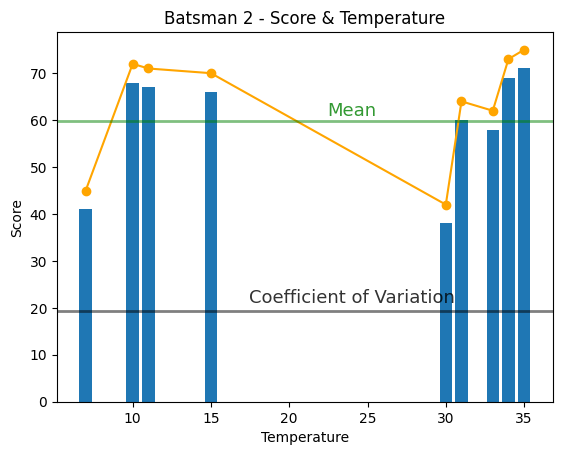

In [12]:
#Defining the y axis (x-axis already defined above)
y2 = df['Batsman 2']

#Using a new list of y variable to maintain some gap between the bars and the line chart to make it visually appealing
y2_new = [i+4 for i in y2]

fig, ax = plt.subplots()
#Plotting bar, line and scatter plots
plt.bar(x, y2, width=0.8)
plt.plot(x, y2_new, color='orange')
plt.scatter(x, y2_new, color='orange')

#plotting line for mean and coefficient of variance
ax.axhline(y2.mean(), color='green', linewidth=2, alpha=0.5)
ax.axhline(cv2, color='black', linewidth=2, alpha=0.5)

#Adding Title and Labels
plt.title('Batsman 2 - Score & Temperature')
plt.xlabel('Temperature')
plt.ylabel('Score')
plt.text(24, 21, 'Coefficient of Variation',fontsize=13, color='black', horizontalalignment="center", alpha=0.8)
plt.text(24, 61, 'Mean',fontsize=13, color='green', horizontalalignment="center", alpha=0.8)

#Showing the plots made
plt.show()

##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

Based on the Exploratory Data Analysis (EDA) performed on the provided DataFrame, we can draw some preliminary conclusions:

1. Batsmen Scores:
   - Batsman 1 generally scores higher than Batsman 2.
   - The histograms show the distribution of scores for both batsmen.

2. Relationship Between Batsmen:
   - The scatter plot between Batsman 1 and Batsman 2 scores shows a positive correlation, indicating that when one batsman scores high, the other also tends to score high.

3. Weather Distribution:
   - The bar plot displays the distribution of 'Warm' and 'Cool' weather based on the temperature.
   - 'Warm' weather is likely associated with temperatures above the mean, while 'Cool' weather is associated with temperatures below the mean.


Batsman 2 is more likely to perform with consistency in the test series happening in England during winter.

Reasoning

*   Batsman 2, when compared to Batsman 1, has more average score and less variance with respect to the mean of scores which helps us understand that he is more reliable and likely to score well and and stay consistent with his runs.
*   Batsman 2, when compared to Batsman 1, shows consistent scoring even during lower temperatures as per the graphs plotted above. We also see the higher score average (Mean) and lower variance (Coefficient of Variance) lines plotted in the graph.

